In [1]:
from sklearn.linear_model import LogisticRegression
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import shutil
import numpy as np
from tqdm import tqdm

In [2]:
path = './data/images/train/'
files = os.listdir(path)
image = cv2.imread(path + files[0])

def get_features(image):
    rgb = image
    B = rgb[:, :, 0].reshape(-1) / 255
    G = rgb[:, :, 1].reshape(-1) / 255
    R = rgb[:, :, 2].reshape(-1) / 255

    hls = cv2.cvtColor(rgb, cv2.COLOR_BGR2HLS)
    H = hls[:, :, 0].reshape(-1) / 255
    L = hls[:, :, 1].reshape(-1) / 255
    S = hls[:, :, 2].reshape(-1) / 255

    return np.array([B, G, R, H, L, S]).T

In [3]:
# X_train
path = './data/images/train/'
files = os.listdir(path)

X_train = []
for file in tqdm(files):
    image = cv2.imread(path + file)
    features = get_features(image)
    
    if len(X_train) == 0:
        X_train = features
    else:
        X_train = np.vstack((X_train, features))


# X_test
path = './data/images/test/'
files = os.listdir(path)

X_test = []
for file in tqdm(files):
    image = cv2.imread(path + file)
    features = get_features(image)
    
    if len(X_test) == 0:
        X_test = features
    else:
        X_test = np.vstack((X_test, features))


# y_train
path = './data/labels/train/'
files = os.listdir(path)

y_train = []
for file in tqdm(files):
    image = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
    _, threshold = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
    threshold = threshold.reshape(-1)

    if len(y_train) == 0:
        y_train = threshold / 255
    else:
        y_train = np.hstack((y_train, threshold / 255))


# y_test
path = './data/labels/test/'
files = os.listdir(path)

y_test = []
for file in tqdm(files):
    image = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
    _, threshold = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
    threshold = threshold.reshape(-1)

    if len(y_test) == 0:
        y_test = threshold / 255
    else:
        y_test = np.hstack((y_test, threshold / 255))

100%|██████████| 5/5 [00:00<00:00, 172.42it/s]


In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)

#print(model.coef_)
#print(model.intercept_)
print("Accuracy:",accuracy)
print("sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("tn: ",tn)
print("tp: ",tp)
print("fn: ",fn)
print("fp: ",fp)
print("\n\n") 

Accuracy: 0.9988705004930967
sensitivity:  0.993206635691162
specificity:  0.999240005996785
tn:  1826257
tp:  118424
fn:  810
fp:  1389





(624, 624, 3)


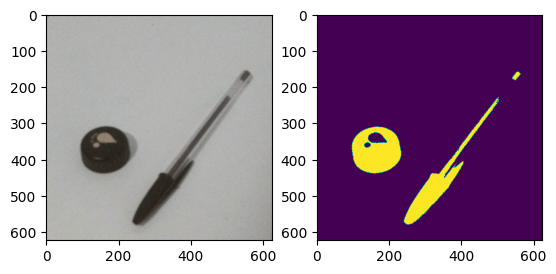

In [9]:
image = cv2.imread('./teste.jpg')
image = cv2.resize(image, (624, 624))
features = get_features(image)
output = model.predict(features)
output = output.reshape(image.shape[0], image.shape[1])
print(image.shape)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[1].imshow(output)

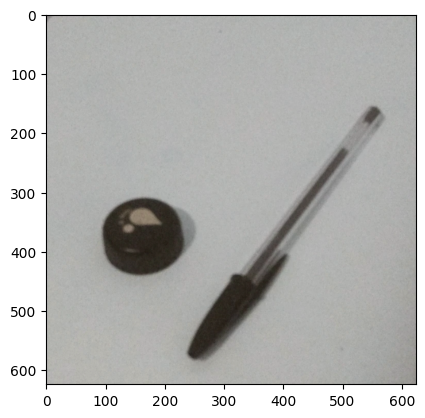

In [191]:
image = cv2.imread('data/images/test/teste.jpg')

plt.imshow(image)